<a href="https://www.inove.com.ar"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ekLfw0AsoodcZkIONBznVKnsM7SsYW-qx66kYaiTAsZ5TZ0_lNLxuRqJWiuuL6j0UwjKa_ArO89y74bcX0GARWYhJMA04Soox_OYmNOohb9_NE2zwAYK7KMOtAj8tDowysed7ergBwBThxGU2epAm8=w1366-h239-no?authuser=0" width="1000" align="center"></a>
<h1>⏵Predicción de los precios de alquiler⏴</h1>
<h4>Sobre este ejemplo</h4>
Esta es una muestra de como aplicamos Machine Learning para determinar cual es el valor de las propiedades en una zona determinada.

In [1]:
# Instalamos dependencias
!pip install -U kaleido
!!wget -O gibioplot.py https://raw.githubusercontent.com/HectorInove/gibioplot/master/gibioplot.py

     |████████████████████████████████| 74.0MB 55kB/s 


['--2020-09-29 20:18:12--  https://raw.githubusercontent.com/HectorInove/gibioplot/master/gibioplot.py',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 5645 (5.5K) [text/plain]',
 'Saving to: ‘gibioplot.py’',
 '',
 '',
 'gibioplot.py          0%[                    ]       0  --.-KB/s               ',
 'gibioplot.py        100%[===================>]   5.51K  --.-KB/s    in 0s      ',
 '',
 '2020-09-29 20:18:12 (54.5 MB/s) - ‘gibioplot.py’ saved [5645/5645]',
 '']

In [2]:
# Importamos librerías
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gibioplot
from sklearn import linear_model
%matplotlib inline

# Flag para renderizado de imágenes,
# True para renderizar como imagenes.png
# False para imagen interactiva

PNG_RENDER = True

# Recolectar datos
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3dp4dMGFr2D00UyD0240fBNyrzptD5onOf1wkHioTvEo-RpDmNEP61ssGPS4IiSKtDEwUHaU8krqeFZi3mjkiQDE72dtJy9zxptu48TYzfnbQp-O1WFZ0LFaXDG-jIz01IQyw2fZJzEFhnk_zK-glgP=w1366-h133-no?authuser=0" width="1000" align="middle"></div>
Descargamos el dataset de alquiler de departamentos

In [4]:
#!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Mendoza
!wget -O propiedades.csv http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal

--2020-09-29 20:19:47--  http://inove.pythonanywhere.com/alquileres/buscar?ubicacion=Capital%20Federal
Resolving inove.pythonanywhere.com (inove.pythonanywhere.com)... 35.173.69.207
Connecting to inove.pythonanywhere.com (inove.pythonanywhere.com)|35.173.69.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111273 (109K) [text/csv]
Saving to: ‘propiedades.csv’

propiedades.csv     100%[===================>] 108.67K  --.-KB/s    in 0.04s   

2020-09-29 20:20:02 (2.71 MB/s) - ‘propiedades.csv’ saved [111273/111273]



# Procesar datos
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ecH_bbd3CY23v8dqfIsuoE1FT7dDeRqxlG4Ti4RzKkOqAHMTD8ukvX7wx_G2PkKFQjNeoGGtL3xoqhCqfKCSdk1lE_2FuTiQaV2jDy3_fZeVbBxgEhtVwGnoLhBfQyb36KZxHPn0puUpJV825MBkQJ=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [5]:
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isnull().sum()
des.loc['%Nan'] = (df.isnull().mean())*100
des

,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,499.000000,499.000000,499.000000,499.000000,497.000000,494.000000
mean,249.000000,-34.436027,-58.350326,35775.911824,67.213340,2.141700
std,144.193157,3.689845,3.514744,48731.456346,67.375001,1.528685
min,0.000000,-38.001750,-120.740135,27.000000,0.000000,0.000000
25%,124.500000,-34.606010,-58.439005,3295.000000,35.000000,1.000000
50%,249.000000,-34.594700,-58.416370,25000.000000,45.000000,2.000000
75%,373.500000,-34.580573,-58.391582,41500.000000,70.000000,3.000000
max,498.000000,47.751076,-34.588875,450000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.400802,1.002004


In [6]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df[df['m2'].notna()]
df_clean = df_clean[df_clean['ambientes'].notna()]

# Explorar datos
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3ePJ3-PFgVLwddhdqRi7z7VRo8j3r6LBSRPzWNek5805rJeEdWJKIbAKGj133aGArHgu1oe8-IDj9ET8FtAW0R5GrUOcPzgG0nnUFhfIRyug0VQ_2DwNB_zmMuReBy60ExzOQprBc8us4HlthdvRtx6=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [7]:
print('Cantidad de departamentos en observacion:', df_clean.shape[0])
df_clean.head()

Cantidad de departamentos en observacion: 494


,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_09_29,-34.611270,-58.363780,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_09_29,-34.586830,-58.439266,https://departamento.mercadolibre.com.ar/MLA-8...,Loft Duplex Palermo Hollywood Amoblado Alqui...,Departamento,79000.0,ARS,70.0,2.0
2,2,2020_09_29,-34.601160,-58.376804,https://departamento.mercadolibre.com.ar/MLA-8...,Dueño Alquila 1 Amb. Amoblado - Caba - Zona:...,Departamento,23500.0,ARS,30.0,1.0
3,3,2020_09_29,-34.548042,-58.466156,https://departamento.mercadolibre.com.ar/MLA-8...,Departamento Equipado Y Amueblado Muy Buen Estado,Departamento,80000.0,ARS,130.0,5.0
4,4,2020_09_29,-34.612488,-58.426605,https://departamento.mercadolibre.com.ar/MLA-8...,"Alquiler Temporario , Zona Hospital Italiano",Departamento,2000.0,ARS,60.0,2.0


## Nos quedamos solamente con aquellas filas que el precio haya sido informado en pesos Argentinos

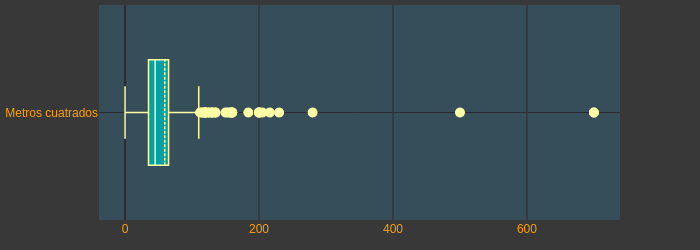

In [8]:
# Filtramos el dataframe
df_ars = df_clean[df_clean['moneda'] == 'ARS']
# Renderizamos el gráfico
title = 'Metros cuatrados'
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.boxplot(title=title, dataset=df_ars['m2'], render='png')
else:
    gibioplot.boxplot(title=title, dataset=df_ars['m2'])

In [9]:
print('Cantidad de departamentos en observacion:', df_ars.shape[0])

Cantidad de departamentos en observacion: 421


## Eliminar los elementos que se van fuera del rango de análisis

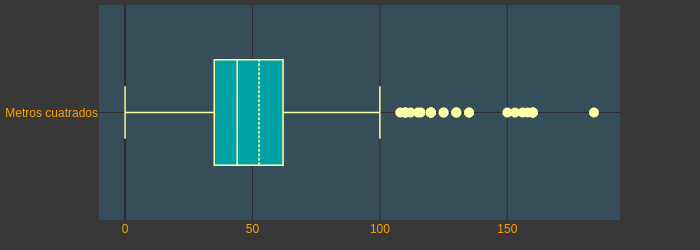

In [10]:
# Nos quedamos solamente con los deparamentos menor a 200m2
propiedades = df_ars[df_ars['m2'] < 200]
# Renderizamos el gráfico
title = 'Metros cuatrados'
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.boxplot(title=title, dataset=propiedades['m2'], render='png')
else:
    gibioplot.boxplot(title=title, dataset=propiedades['m2'])

In [11]:
print('Cantidad de departamentos en observacion:', propiedades.shape[0])

Cantidad de departamentos en observacion: 411


# Entrenar modelo
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3csSQnxbKYYltM7w3bryOXpVvhrxI8PZ-xHKtEleb8SiwPjx_vNiCIfYQUVVUtCUz5zyhyCGqCjj9mWlHcXqmSZpHL5lrQrCcnbg0tRQiWYmATPeAzVKVrQGCA22rH7R9QrQsOFjeXmw3z4a17k_GTn=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

In [12]:
# Calcular y visualizar le prediccion de costos por m2
regr = linear_model.LinearRegression()
#x = np.asanyarray(propiedades[['ambientes','m2']])
x = np.asanyarray(propiedades[['m2']])
y = np.asanyarray(propiedades['precio'])
regr.fit(x, y)
#y_hat= regr.predict(propiedades[['ambientes','m2']])
y_hat= regr.predict(propiedades[['m2']])

# Validar modelo
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cak4pQwIT8LrDUfrv0XXdf9MfEDbCytI3Yttzzd8BG0AyqJ74FpFe5kVMZ0UoKguSjr3-_qKe1Qg2eWEk5YalKmtcwGFV5OS2CmmoVsEPIRpUZeg4SzIDrcQDRTGNP-9RPT4q1VVXrHtCdCZDYrfgW=w1366-h133-no?authuser=0" width="1000" align="middle"></div>

Correlación: 0.60


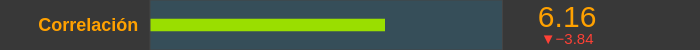

In [21]:
from sklearn.metrics import r2_score
title = 'Correlación'
# En este caso, ya que se trata de una regresión lineal puedo relacinonar el
# índice R2 con el coeficiente de correlación lineal.
value = np.sqrt(r2_score(y, y_hat))
print(title+": %.2f" % value)
value = error_medio
reference = 10
if PNG_RENDER:
    filename = title + '.png'
    gibioplot.plot_meter(title=title, value=value, render='png', filename=filename)
else:
    gibioplot.plot_meter(title=title, value=value, reference=reference)

# Utilizar modelo
<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3cCImYtu1CcKuITmTpV7hyJmrEt_8ADIqZiqlksAyNwCvcwR8sDZLQl54gmo4sobCgb3vpuzjWAFDkBh6cT33oBYTMJMyltD25Q8einZ37Gx_9gsCLI50iBX1wo3fz5c0BaedWiyJs3MdHotbxnkSjg=w1366-h133-no?authuser=0" width="1000" align="middle"
></div>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



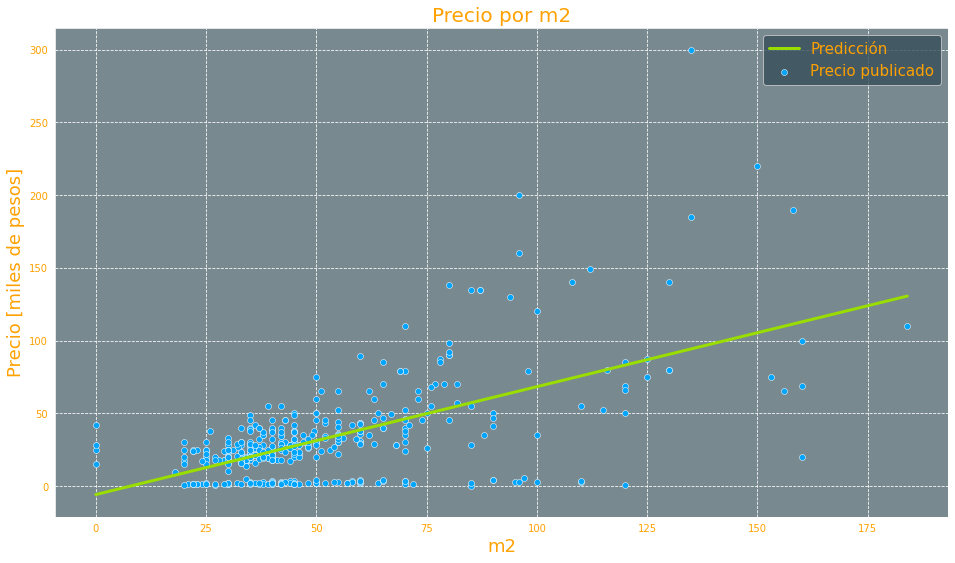

In [14]:
gibioplot.plot_dot_line(propiedades['m2'], propiedades['precio'], y_hat)

<div align="center"><img src="https://lh3.googleusercontent.com/pw/ACtC-3c0b9wdQXhFVvYu-h9-AsPEg621I8En-CINRW5eJhYJweohC0gQ-8j-ZftxoZ6TXZWQbFRoLxNCH_xLHjnEEUMMKg9k72CQU8Zyd2if6CFBPWV_8umCQXI543v6o1cOhk5001p-pKe8wIOb2eSa2KN7=w1366-h133-no?authuser=0" width="1000" align="middle"></div>